In [1]:
from IPython.display import JSON
from pandas import json_normalize
import sqlite3
import pandas as pd
import json
from tqdm import tqdm
import pickle
import pymongo
import sys
import random
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import re
import collections
from collections import Counter
import ast
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import SpectralCoclustering
from sklearn.cluster import SpectralBiclustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import difflib
from sklearn.metrics import consensus_score

In [2]:
df_func_new = pd.read_csv('new_func_matix.csv', nrows = 8500, usecols = range(8271), dtype='unicode')
#df_func_new = df_func_new.apply(lambda x: x.astype(str).str.lower())
df_func_new

,VirtualAlloc,GetThreadLocale,GetCapture,GetCurrentThreadId,GetDialogBaseUnits,GetDoubleClickTime,CryptUnprotectData,PFXExportCertStoreEx,CertCloseStore,CertOpenStore,...,DirectInputCreateEx,DrawDibTime,DrawDibStart,ICOpenFunction,LsaOpenTrustedDomain,DDGetAttachedSurfaceLcl,GetSurfaceFromDC,AVIClearClipboard,AVIStreamAddRef,AVISaveVA
0,kernel32.dll,kernel32.dll,user32.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kernel32.dll,NaN,NaN,kernel32.dll,user32.dll,user32.dll,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KERNEL32.dll,NaN,NaN,KERNEL32.dll,NaN,NaN,CRYPT32.dll,CRYPT32.dll,CRYPT32.dll,CRYPT32.dll,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kernel32.dll,kernel32.dll,user32.dll,kernel32.dll,NaN,user32.dll,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,kernel32.dll,NaN,NaN,NaN,user32.dll,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8496,kernel32.dll,kernel32.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8497,kernel32.dll,NaN,NaN,NaN,user32.dll,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8498,kernel32.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#drops rows with inf or nan
df_func_new = df_func_new.dropna(how='all')
#df_func_new.astype(float)

In [4]:
df_func_new = df_func_new.replace(to_replace=r'[\s\S.\s\S]', value=int(1), regex=True)
df_func_new = df_func_new.fillna(0)
df_func_new = df_func_new.astype(int)

In [5]:
df_func_new

,VirtualAlloc,GetThreadLocale,GetCapture,GetCurrentThreadId,GetDialogBaseUnits,GetDoubleClickTime,CryptUnprotectData,PFXExportCertStoreEx,CertCloseStore,CertOpenStore,...,DirectInputCreateEx,DrawDibTime,DrawDibStart,ICOpenFunction,LsaOpenTrustedDomain,DDGetAttachedSurfaceLcl,GetSurfaceFromDC,AVIClearClipboard,AVIStreamAddRef,AVISaveVA
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8496,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8497,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8498,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#df_func_new = df_func_new.replace([np.inf, -np.inf], np.nan).dropna(axis=1) # You can replace inf and -inf with NaN, and then select non-null rows.

In [7]:
Y = df_func_new.values

In [8]:
Y

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
#drops rows with inf or nan for shuffled array as well
Y = np.nan_to_num(Y, copy=False, nan=0, posinf=0, neginf=0)

Text(0.5, 1.0, 'Original dataset')

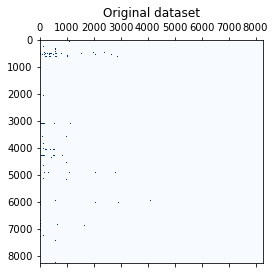

In [10]:
plt.matshow(Y, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [11]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(Y.shape[0])
col_idx = rng.permutation(Y.shape[1])
#Y = Y[row_idx][:, col_idx]
X = Y[row_idx][:, col_idx]

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
Y

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.0, 'Shuffled dataset')

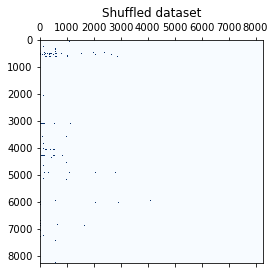

In [14]:
plt.matshow(Y, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

In [30]:
n_clusters = (2,2)
model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
#model.fit(Y)
model.fit(X)

SpectralBiclustering(method='log', n_clusters=(2, 2), random_state=0)

In [31]:
#rows, columns = Y.shape
# Get the row and column permutation indices that sort the clustered matrix
row_order = np.argsort(model.row_labels_)
col_order = np.argsort(model.column_labels_)

# Rearrange the rows and columns of the binary_features matrix based on the clusters
#binary_features_reorderedX = Y[row_order, :]
#binary_features_reorderedY = binary_features_reordered[:, col_order]

# Calculate the consensus score (a measure of how well the clusters match the input matrix)
#consensus = consensus_score(model.biclusters_, (Y[:, row_idx], Y[:, col_idx]))
consensus = consensus_score(model.biclusters_, (row_idx, col_idx))
# Print the consensus score
print("Consensus score: {:.3f}".format(consensus))


Consensus score: -0.000


In [28]:
Y.shape

(8271, 8271)